In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#from src.time_frequency import plot_tf
from pathlib import Path
from mne.viz import centers_to_edges

In [2]:
plt.style.use('ggplot')
fig_width = 16  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 10
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': label_size,
          'xtick.labelsize': label_size,
          'ytick.labelsize': label_size,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

In [39]:
cohort_dic = {'AnRa': 'S0', 'ArLa': 'S1', 'DiAs': 'S2'}
cifar_path = Path('~','projects','cifar').expanduser()
fpath = cifar_path.joinpath('results')
#fpath = fpath.joinpath("time_frequency.csv")
subject = 'DiAs'
vmax = 15
fname = "tf_power_dataframe.pkl"
fpath = fpath.joinpath(fname)

In [40]:
df = pd.read_pickle(fpath)
conditions = ['Rest', 'Face', 'Place']
groups = ['R','O','F']
group_dic = {'R': 'Retinotopic', 'O':'Other', 'F':'Face'}
ngroup = 3
ncdt = 3

/tmp/ipykernel_57413/1624618974.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax[i,j].pcolormesh(x, y, power, cmap='RdBu_r', vmax=vmax, vmin=-vmax)
/tmp/ipykernel_57413/1624618974.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(mesh, cax=cbar_ax)


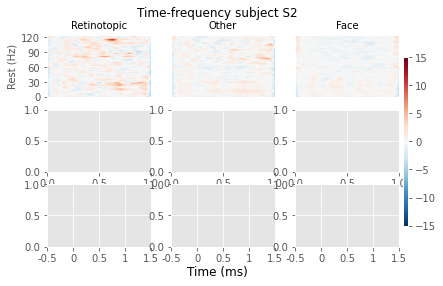

In [41]:
fig, ax = plt.subplots(ngroup, ncdt, sharex=False, sharey=False)
cbar_ax = fig.add_axes([0.91, 0.2, .01, .6])
for i, condition in enumerate(conditions):
        for j, group in enumerate(groups):
            power = df['power'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
            freqs = df['freqs'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
            time = df['time'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
            power = power.iloc[0]
            freqs = freqs.iloc[0]
            time = time.iloc[0]
            x, y = centers_to_edges(time * 1000, freqs)
            mesh = ax[i,j].pcolormesh(x, y, power, cmap='RdBu_r', vmax=vmax, vmin=-vmax)
            ax[0,j].set_title(f'{group_dic[group]}')
            ax[i,j].set(ylim=freqs[[0, -1]])
            if i<=2:
                    ax[i,j].set_xticks([]) # (turn off xticks)
            if j>=1:
                    ax[i,j].set_yticks([]) # (turn off xticks)
            ax[-1,j].set_xticks([-500, 0, 500, 1000, 1500])
            ax[-1,j].set_xticklabels([-0.5, 0, 0.5, 1, 1.5]) 
            ax[i,0].set_yticks([0, 30, 60, 90, 120])
            ax[i,0].set_yticklabels([0, 30, 60, 90, 120])
            ax[i,0].set_ylabel(f"{condition} (Hz)")
        fig.colorbar(mesh, cax=cbar_ax)
        fig.supxlabel("Time (ms)")
        fig.suptitle(f"Time-frequency subject {cohort_dic[subject]}")
        plt.show()

In [17]:
power = df['power'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
freqs = df['freqs'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
time = df['time'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]

In [22]:
# Get arguments from input_config
%run ../src/input_config.py

In [8]:
fpath = Path('..','data_transfer')
fname = "tf_power_dataframe.pkl"
fpath = fpath.joinpath(fname)
df = pd.read_pickle(fpath)

In [18]:
# Write plotting function to plot Time freq for each subjects
conditions = ['Rest', 'Face', 'Place']
groups = ['R','O','F']
ngroup = 3
ncdt = 3
%matplotlib qt
vmax = 15
vmin = -vmax
subject = 'DiAs'
df_sub = df['power'].loc[df['subject']==subject]
from mne.viz import centers_to_edges
fig, ax = plt.subplots(ngroup, ncdt, sharex=True, sharey=True)
for i, condition in enumerate(conditions):
    for j, group in enumerate(groups):
        power = df['power'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
        freqs = df['freqs'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
        time = df['time'].loc[df['subject']==subject].loc[df['condition']==condition].loc[df['group']==group]
        power = power.iloc[0]
        freqs = freqs.iloc[0]
        time = time.iloc[0]
        x, y = centers_to_edges(time * 1000, freqs)
        mesh = ax[i,j].pcolormesh(x, y, power, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        ax[i,j].set_title(f'{group} Power during {condition}')
        ax[i,j].set(ylim=[0, 50], xlabel='Time (ms)', ylabel='Freq (Hz)')
fig.colorbar(mesh)
plt.tight_layout()
plt.show()

In [3]:
%matplotlib qt
%run ../scripts/plot_scripts/plot_time_frequency.py